In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# import data
df = pd.read_csv("train.csv")
dft = pd.read_csv("test.csv")

dataFrame = pd.concat([df, dft], axis=0)
dataFrame.shape

(12970, 14)

In [3]:
dataFrame.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
dataFrame.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [5]:
F = dataFrame.loc[dataFrame["Transported"] == False]
T = dataFrame.loc[dataFrame["Transported"] == True]

([<matplotlib.patches.Wedge at 0x7fd368e122e0>,
 [Text(6.735557395310444e-17, 1.1, 'True'),
  Text(-2.0206672185931328e-16, -1.1, 'False')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

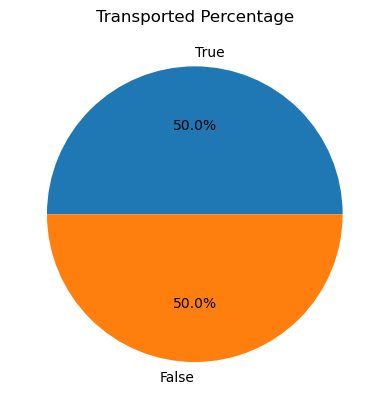

In [6]:
# Data Visualizations - Get an idea for various distributions

dfT = (dataFrame["Transported"] == "True").count()
dfF = (dataFrame["Transported"] == "False").count()
counts = [dfT, dfF]
labels = ["True", "False"]


fig, ax = plt.subplots()
plt.title("Transported Percentage")
ax.pie(counts, labels = labels, autopct='%1.1f%%')

In [7]:
#GET VALUE COUNTS FOR CATEGORICAL VARIABLES
HomePlanet_T = T["HomePlanet"].value_counts().reset_index()
HomePlanet_T.columns = ["HomePlanet", "population"]
VIP_T = T["VIP"].value_counts().reset_index()
VIP_T.columns = ["VIP", "population"]
Destination_T = T["Destination"].value_counts().reset_index()
Destination_T.columns = ["Destination", "population"]
Cryo_T = T["CryoSleep"].value_counts().reset_index()
Cryo_T.columns = ["CryoSleep", "population"]

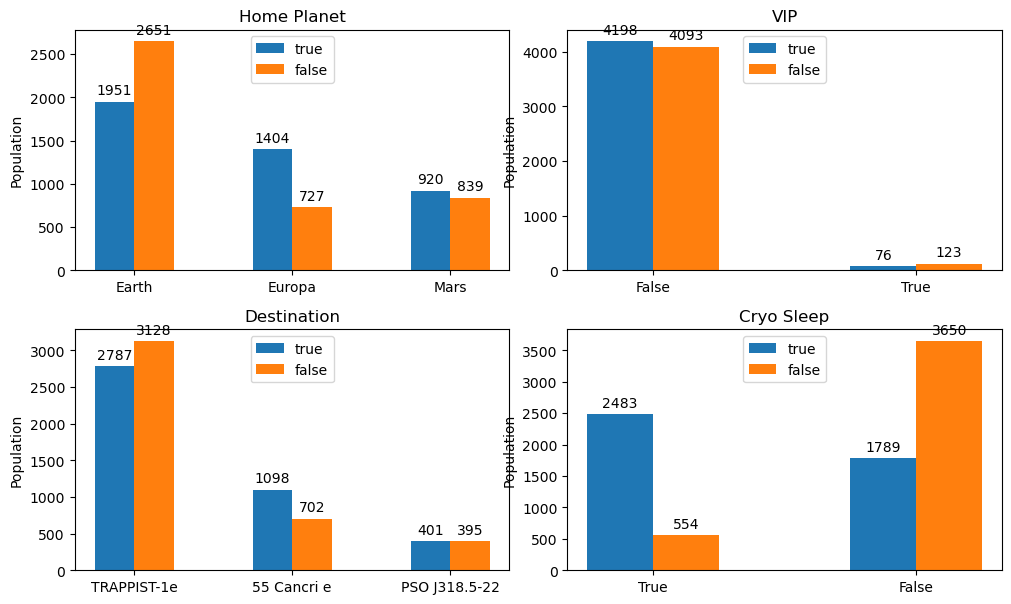

In [8]:
#LIST OF ATTRIBUTES FOR EACH CATEGORY
Planets = HomePlanet_T["HomePlanet"].tolist()
VIP = VIP_T["VIP"].tolist()
Dest = Destination_T["Destination"].tolist()
Cryo = Cryo_T["CryoSleep"].tolist()

#HOME PLANET
pt = []
pf = []
for planet in Planets:
    pt.append(len(T.loc[T["HomePlanet"] == planet]))
    pf.append(len(F.loc[F["HomePlanet"] == planet]))
planets = {}
planets["true"] = pt
planets["false"] = pf

#VIP
vt = []
vf = []
for att in VIP:
    vt.append(len(T.loc[T["VIP"] == att]))
    vf.append(len(F.loc[F["VIP"] == att]))
vip = {}
vip["true"] = vt
vip["false"] = vf

#DEST
dt = []
df = []
for place in Dest:
    dt.append(len(T.loc[T["Destination"] == place]))
    df.append(len(F.loc[F["Destination"] == place]))
dest = {}
dest["true"] = dt
dest["false"] = df

#CRYO
ct = []
cf = []
for sleep in Cryo:
    ct.append(len(T.loc[T["CryoSleep"] == sleep]))
    cf.append(len(F.loc[F["CryoSleep"] == sleep]))
cryo = {}
cryo["true"] = ct
cryo["false"] = cf

#PLOTS FOR EACH VARIABLE
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2,figsize=(10,6))
width = 0.25  # the width of the bars
plt.title("Categorical Variables: Transported vs Not Transported")
plt.tight_layout()

#HOME
x1 = np.arange(len(Planets))  # the label locations
multiplier1 = 0

for attribute, measurement in planets.items():
    offset = width * multiplier1
    rects = ax1.bar(x1 + offset, measurement, width, label=attribute)
    ax1.bar_label(rects, padding=3)
    multiplier1 += 1

ax1.title.set_text('Home Planet')
ax1.set_ylabel('Population')
ax1.set_xticks(x1 + (width/2), Planets)
ax1.legend(loc='upper center')

#VIP
x2 = np.arange(len(VIP))  # the label locations
multiplier2 = 0

for attribute, measurement in vip.items():
    offset = width * multiplier2
    rects = ax2.bar(x2 + offset, measurement, width, label=attribute)
    ax2.bar_label(rects, padding=3)
    multiplier2 += 1
ax2.title.set_text("VIP")
ax2.set_ylabel('Population')
ax2.set_xticks(x2 + (width/2), VIP)
ax2.legend(loc='upper center')
    
#DEST
x3 = np.arange(len(Dest))  # the label locations
multiplier3 = 0

for attribute, measurement in dest.items():
    offset = width * multiplier3
    rects = ax3.bar(x3 + offset, measurement, width, label=attribute)
    ax3.bar_label(rects, padding=3)
    multiplier3 += 1
ax3.title.set_text("Destination")
ax3.set_ylabel('Population')
ax3.set_xticks(x3 + (width/2), Dest)
ax3.legend(loc='upper center')

#CRYO
x4 = np.arange(len(Cryo))  # the label locations
multiplier4 = 0

for attribute, measurement in cryo.items():
    offset = width * multiplier4
    rects = ax4.bar(x4 + offset, measurement, width, label=attribute)
    ax4.bar_label(rects, padding=3)
    multiplier4 += 1
ax4.title.set_text("Cryo Sleep")
ax4.set_ylabel('Population')
ax4.set_xticks(x4 + (width/2), Cryo)
ax4.legend(loc='upper center')

plt.show()

array([[<AxesSubplot:title={'center':'Age'}, xlabel='[Transported]'>,
        <AxesSubplot:title={'center':'FoodCourt'}, xlabel='[Transported]'>],
       [<AxesSubplot:title={'center':'RoomService'}, xlabel='[Transported]'>,
        <AxesSubplot:title={'center':'ShoppingMall'}, xlabel='[Transported]'>],
       [<AxesSubplot:title={'center':'Spa'}, xlabel='[Transported]'>,
        <AxesSubplot:title={'center':'VRDeck'}, xlabel='[Transported]'>]],
      dtype=object)

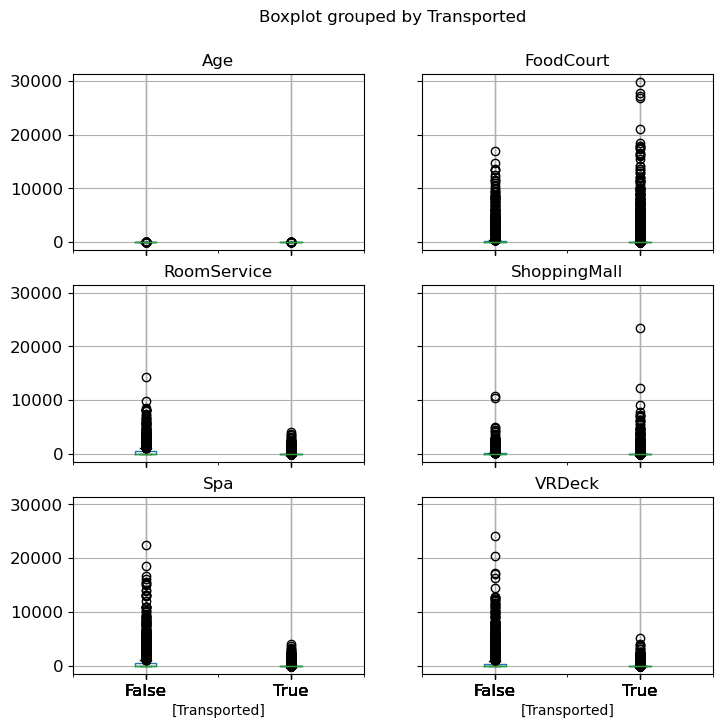

In [9]:
dataFrame.boxplot(by="Transported", figsize=(8,8), fontsize=12)

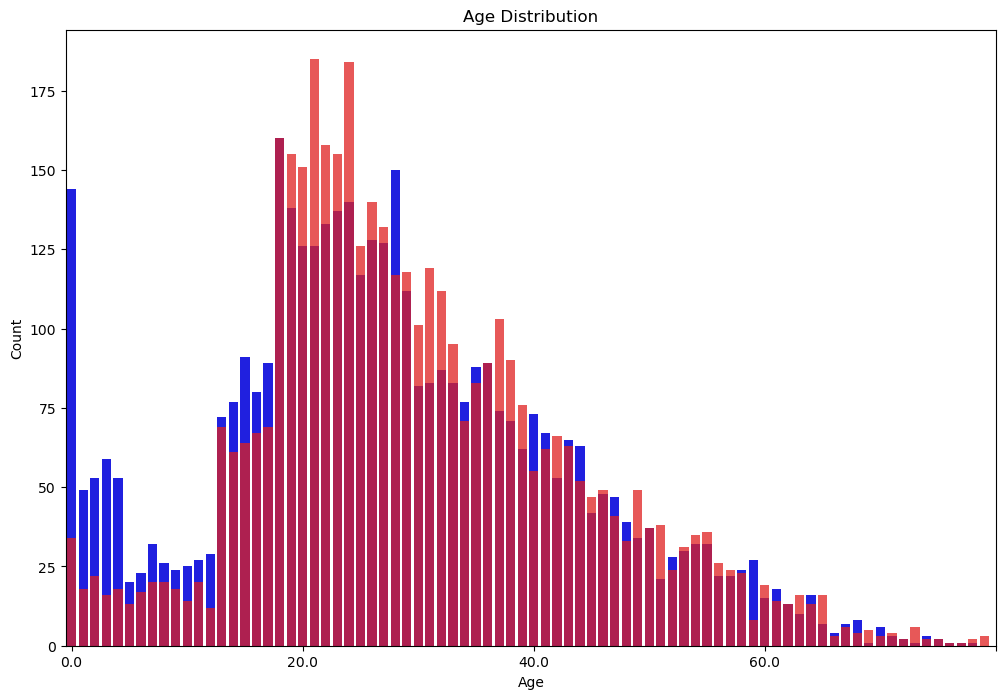

In [10]:
age_T = T['Age'].value_counts().reset_index()
age_T.columns = ['Age', 'Count']
age_F = F['Age'].value_counts().reset_index()
age_F.columns = ['Age', 'Count']
plt.figure(figsize=(12, 8))
plot_T = sns.barplot(x='Age', y='Count', data=age_T, color = 'b')
plot_F = sns.barplot(x='Age', y='Count', data=age_F, color = 'r', alpha = 0.75)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.xticks([0, 20, 40, 60, 80])
plt.ylabel('Count')
plt.show()

In [11]:
# Data Preprocessing
# Grouping passengers and determining their group size

dataFrame["PassengerGroup"] = dataFrame["PassengerId"].apply(lambda x: x.split("_")[0])

groupsize = dataFrame.groupby("PassengerGroup").size().reset_index(name = "GroupSize")
dataFrame = dataFrame.merge(groupsize, on = "PassengerGroup")

In [12]:
dataFrame["Solo"] = dataFrame["GroupSize"].apply(lambda x: 0 if x>1 else 1)

In [13]:
dataFrame.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,GroupSize,Solo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,1


In [14]:
# Cabin 
dataFrame[["CabinDeck", "CabinNum", "CabinSide"]] = dataFrame["Cabin"].str.split("/", expand = True)

dataFrame.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,GroupSize,Solo,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,1,F,1,S


In [15]:
df_f = dataFrame.loc[dataFrame["Transported"] == False]
df_t = dataFrame.loc[dataFrame["Transported"] == True]

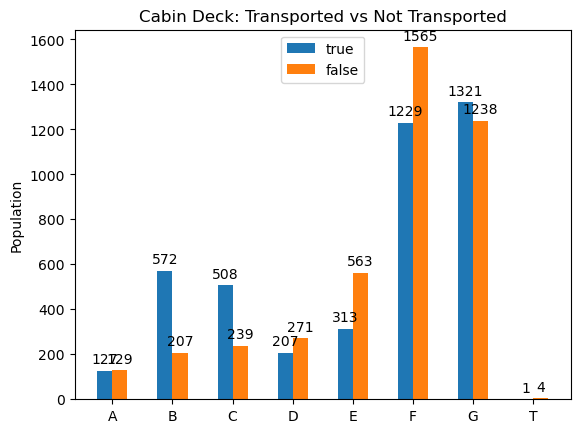

In [16]:
#PLOT CABIN POPULATION OF CABIN DECK
cabin_deck = dataFrame['CabinDeck'].value_counts().reset_index()
cabin_deck.columns = ['CabinDeck', 'population']

#LIST OF CATEGORICAL VARIABLES
deck = cabin_deck["CabinDeck"].tolist()
deck = sorted(deck)

#CABIN DECK
Dt = []
Df = []
for cabin in deck:
    Dt.append(len(df_t.loc[df_t["CabinDeck"] == cabin]))
    Df.append(len(df_f.loc[df_f["CabinDeck"] == cabin]))
decks = {}
decks["true"] = Dt
decks["false"] = Df

#PLOTS FOR EACH VARIABLE
fig, ax = plt.subplots()
width = 0.25  # the width of the bars
plt.title("Cabin Deck: Transported vs Not Transported")

x = np.arange(len(deck))  # the label locations
multiplier = 0

for attribute, measurement in decks.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Population')
ax.set_xticks(x + (width/2), deck)
ax.legend(loc='upper center')
plt.show()

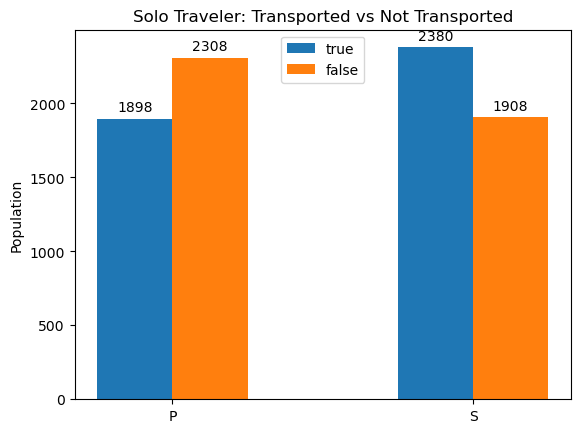

In [17]:
#PLOT TRANSPORTED VS CABIN SIDE
cabin_side = dataFrame['CabinSide'].value_counts().reset_index()
cabin_side.columns = ['CabinSide', 'population']

#LIST OF CATEGORICAL VARIABLES
side = cabin_side["CabinSide"].tolist()
side = sorted(side)

#SOLO
Sit = []
Sif = []
for place in side:
    Sit.append(len(df_t.loc[df_t["CabinSide"] == place]))
    Sif.append(len(df_f.loc[df_f["CabinSide"] == place]))
sides = {}
sides["true"] = Sit
sides["false"] = Sif

#PLOTS FOR EACH VARIABLE
fig, ax = plt.subplots()
width = 0.25  # the width of the bars
plt.title("Solo Traveler: Transported vs Not Transported")

si = np.arange(len(side))  # the label locations
multiplier = 0

for attribute, measurement in sides.items():
    offset = width * multiplier
    rects = ax.bar(si + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Population')
ax.set_xticks(si + (width/2), side)
ax.legend(loc='upper center')
plt.show()

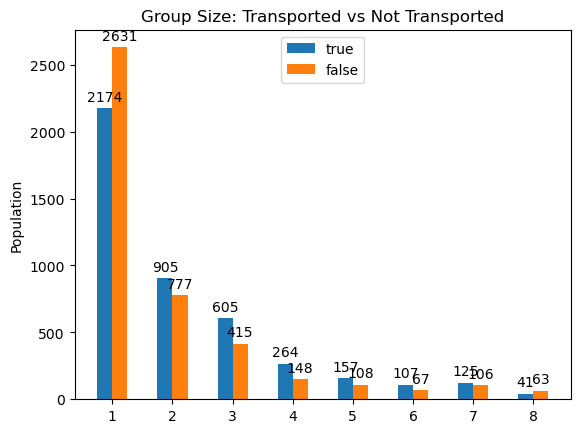

In [18]:
#PLOT TRANSPORTED VS GROUP SIZE
group_size = dataFrame['GroupSize'].value_counts().reset_index()
group_size.columns = ['GroupSize', 'population']

#LIST OF CATEGORICAL VARIABLES
size = group_size["GroupSize"].tolist()
size = sorted(size)

#GROUP SIZE
St = []
Sf = []
for num in size:
    St.append(len(df_t.loc[df_t["GroupSize"] == num]))
    Sf.append(len(df_f.loc[df_f["GroupSize"] == num]))
sizes = {}
sizes["true"] = St
sizes["false"] = Sf

#PLOTS FOR EACH VARIABLE
fig, ax = plt.subplots()
width = 0.25  # the width of the bars
plt.title("Group Size: Transported vs Not Transported")

s = np.arange(len(size))  # the label locations
multiplier = 0

for attribute, measurement in sizes.items():
    offset = width * multiplier
    rects = ax.bar(s + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Population')
ax.set_xticks(s + (width/2), size)
ax.legend(loc='upper center')
plt.show()

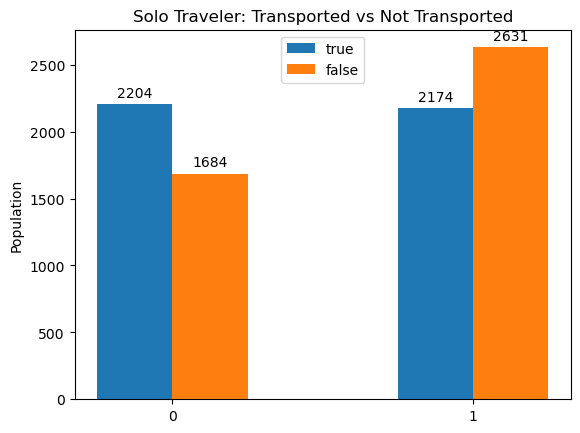

In [19]:
#PLOT TRANSPORTED VS SOLO
solitary = dataFrame['Solo'].value_counts().reset_index()
solitary.columns = ['Solo', 'population']

#LIST OF CATEGORICAL VARIABLES
single = solitary["Solo"].tolist()
single = sorted(single)

#SOLO
Sot = []
Sof = []
for traveler in single:
    Sot.append(len(df_t.loc[df_t["Solo"] == traveler]))
    Sof.append(len(df_f.loc[df_f["Solo"] == traveler]))
singles = {}
singles["true"] = Sot
singles["false"] = Sof

#PLOTS FOR EACH VARIABLE
fig, ax = plt.subplots()
width = 0.25  # the width of the bars
plt.title("Solo Traveler: Transported vs Not Transported")

so = np.arange(len(single))  # the label locations
multiplier = 0

for attribute, measurement in singles.items():
    offset = width * multiplier
    rects = ax.bar(so + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Population')
ax.set_xticks(so + (width/2), single)
ax.legend(loc='upper center')
plt.show()

In [20]:
df = dataFrame.copy()

In [21]:
df = df.drop(['PassengerId', 'Cabin'], axis = 1)
df.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,GroupSize,Solo,CabinDeck,CabinNum,CabinSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,1,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,1,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,0,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,0,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,1,F,1,S


In [22]:
#FILL MISSING VALUES
#HomePlanet
missing_planets = df["HomePlanet"].isna().sum()
print(f"Number of missing values in HomePlanet: {missing_planets}")

Number of missing values in HomePlanet: 288


In [23]:
# If travelers are in the same passenger group they are likely from the same home planet
df['HomePlanet'] = df.groupby('PassengerGroup')['HomePlanet'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

missing_planets_1 = df["HomePlanet"].isna().sum()

print(f"Number of missing values after first cleaning: {missing_planets_1}")

Number of missing values after first cleaning: 157


In [24]:
# Travelers with the same last name are likely family members and are from the same planet
df['LastName'] = df['Name'].apply(lambda x: x.split(" ")[1] if not pd.isna(x) else np.nan)

ln_gb = df.groupby('LastName')['HomePlanet'].agg(pd.Series.mode)
ln_index = df[df['HomePlanet'].isna() & df['LastName'].notna() & df['LastName'].isin(ln_gb.index)].index

def fill_homeplanet(last_name):
    homeplanet_mode = ln_gb[last_name]
    if isinstance(homeplanet_mode, np.ndarray):
        return homeplanet_mode[0] if homeplanet_mode.size > 0 else np.nan
    return homeplanet_mode

df.loc[ln_index, 'HomePlanet'] = df.loc[ln_index, 'LastName'].map(fill_homeplanet)

missing_planets_2 = df['HomePlanet'].isna().sum()

print(f"Number of missing values after second cleaning: {missing_planets_2}")

Number of missing values after second cleaning: 13


In [25]:
# Now just fill in the rest of the missing values with the current mode of HomePlanet
df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])

missing_planets_3 = df['HomePlanet'].isna().sum()

print(f"Number of missing values after final cleaning: {missing_planets_3}")

Number of missing values after final cleaning: 0


In [26]:
#Destination
missing_dest = df["Destination"].isna().sum()
print(f"Number of missing values in Destination: {missing_dest}")

Number of missing values in Destination: 274


In [27]:
# If travelers are in the same passenger group they are likely going to same place
df['Destination'] = df.groupby('PassengerGroup')['Destination'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

missing_dest_1 = df["Destination"].isna().sum()

print(f"Number of missing values after first cleaning: {missing_dest_1}")

Number of missing values after first cleaning: 154


In [28]:
ln_gb = df.groupby('LastName')['Destination'].agg(pd.Series.mode)
ln_index = df[df['Destination'].isna() & df['LastName'].notna() & df['LastName'].isin(ln_gb.index)].index

def fill_destination(last_name):
    dest_mode = ln_gb[last_name]
    if isinstance(dest_mode, np.ndarray):
        return dest_mode[0] if dest_mode.size > 0 else np.nan
    return dest_mode

df.loc[ln_index, 'Destination'] = df.loc[ln_index, 'LastName'].map(fill_destination)

missing_dest_2 = df['Destination'].isna().sum()

print(f"Number of missing values after second cleaning: {missing_dest_2}")

Number of missing values after second cleaning: 6


In [29]:
# Now just fill in the rest of the missing values with the current mode of HomePlanet
df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])

missing_dest_3 = df['Destination'].isna().sum()

print(f"Number of missing values after final cleaning: {missing_dest_3}")

Number of missing values after final cleaning: 0


In [30]:
#VIP
missing_VIP = df["VIP"].isna().sum()
print(f"Number of missing values in VIP: {missing_VIP}")

Number of missing values in VIP: 296


In [31]:
# Fill in missing VIP values by amount they spent
df_VIP = df[df["VIP"]==True]
df_NOT = df[df["VIP"]==False]

avg_VIP = round(np.mean(df_VIP["RoomService"] + df_VIP["FoodCourt"] + df_VIP["ShoppingMall"] + df_VIP["Spa"] + df_VIP["VRDeck"]), 2)
avg_non = round(np.mean(df_NOT["RoomService"] + df_NOT["FoodCourt"] + df_NOT["ShoppingMall"] + df_NOT["Spa"] + df_NOT["VRDeck"]), 2)

print(f"Average spent by a VIP: {avg_VIP}")
print(f"Average spent by a Non-VIP: {avg_non}")

Average spent by a VIP: 4812.56
Average spent by a Non-VIP: 1390.98


In [32]:
# Find lower bound of VIP amount spent and classify VIP or not on that threshold
std_VIP = round(np.std(df_VIP["RoomService"] + df_VIP["FoodCourt"] + df_VIP["ShoppingMall"] + df_VIP["Spa"] + df_VIP["VRDeck"]), 2)

standard_error = std_VIP/len(df_VIP)
conf_level = 0.95
z = stats.norm.ppf((1+conf_level)/2)
margin_error = round(z*standard_error, 2)

lower_bound = avg_VIP - margin_error

print(f"VIP amount spent threshold: {lower_bound}")

VIP amount spent threshold: 4772.18


In [33]:
# Classify empty VIP values as VIP or not by seeing if they spent more than $4772.18
df["Expenditure"] = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

df.loc[df["VIP"].isna(), "VIP"] = df["Expenditure"] >= lower_bound

In [34]:
missing_VIP_2 = df["VIP"].isna().sum()

print(f"Missing VIP values after cleaning: {missing_VIP_2}")

Missing VIP values after cleaning: 0


In [35]:
# Now fill in calues for the Cabin Columns
#By Passenger Group
def fill_missing_grp(df, column, group_col):
    df[column] = df.groupby(group_col)[column].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    return df

# By Last Name
def fill_missing_by_lastname(df, column, lastname_col):
    ln_gb = df.groupby(lastname_col)[column].agg(pd.Series.mode)
    ln_index = df[df[column].isna() & df[lastname_col].notna() & df[lastname_col].isin(ln_gb.index)].index
    
    def fill_mode(last_name):
        mode_value = ln_gb[last_name]
        if isinstance(mode_value, np.ndarray):
            return mode_value[0] if mode_value.size > 0 else np.nan
        return mode_value

    df.loc[ln_index, column] = df.loc[ln_index, lastname_col].map(fill_mode)
    return df

columns = ["CabinDeck", "CabinNum", "CabinSide"]

for column in columns:
    df = fill_missing_grp(df, column, "PassengerGroup")
    df = fill_missing_by_lastname(df, column, "LastName")
    df[column] = df[column].fillna(df[column].mode()[0])
    
print("Number of missing after cleaning: \n")
for column in columns:
    cabin_final = df[column].isna().sum()
    print(f"{column}: {cabin_final}")

Number of missing after cleaning: 

CabinDeck: 0
CabinNum: 0
CabinSide: 0


In [36]:
# Change categorical variables to numeric
df_1 = df.copy()

df_1["CabinSide"] = df_1["CryoSleep"].replace({"P": 1, "S": 0})
df_1["HomePlanet"] = df_1["HomePlanet"].replace({"Earth": 0, "Europa": 1, "Mars": 2})
df_1["Destination"] = df_1["Destination"].replace({"TRAPPIST-1e": 0, "55 Cancri e": 1, "PSO J318.5-11": 2, "PSO J318.5-22": 3})

In [37]:
# Cabin Deck to Numeric
def cabin_deck_categorize(cabin_deck):
    if cabin_deck == 'A':
        return 0
    elif cabin_deck == 'B':
        return 1
    elif cabin_deck == 'C':
        return 2
    elif cabin_deck == 'D':
        return 3
    elif cabin_deck == 'E':
        return 4
    elif cabin_deck == 'F':
        return 5
    elif cabin_deck == 'G':
        return 6
    else:
        return 7

df_1["Cabin_deckGroup"] = df_1["CabinDeck"].apply(lambda x: cabin_deck_categorize(x))

In [38]:
df_X = df_1.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'LastName',
                           'PassengerGroup', 'GroupSize', 'Transported', 'CabinDeck'], axis=1)

df_y = df_1['Transported']

In [39]:
catboost_regressor = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=0
)

imputer = IterativeImputer(estimator=catboost_regressor, random_state=0)
data_imputed = imputer.fit_transform(df_X)
data_imputed = pd.DataFrame(data_imputed, columns=df_X.columns)

In [40]:
df_2 = pd.concat([data_imputed, df_y], axis=1)

In [41]:
df_2["CabinNum"] = df_2["CabinNum"].astype(int)

In [42]:
# Group Cabin number
def cabin_num_group(cabin_num):
    if cabin_num <= 300:
        return 0
    elif cabin_num <= 600:
        return 1
    elif cabin_num <= 900:
        return 2
    elif cabin_num <= 1200:
        return 3
    elif cabin_num <= 1500:
        return 4
    elif cabin_num <= 1800:
        return 5
    else:
        return 6

df_2["Cabin_numGroup"] = df_2["CabinNum"].apply(lambda x: cabin_num_group(x))

In [43]:
# Group Ages
def age_group(age):
    if age <= 12:
        return 0
    elif age <= 17:
        return 1
    elif age <= 25:
        return 2
    elif age <= 30:
        return 3
    elif age <= 50:
        return 4
    else:
        return 5

df_2["Age_Group"] = df_2["Age"].apply(lambda x: age_group(x))

In [44]:
df_2.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,Solo,CabinNum,CabinSide,Expenditure,Cabin_deckGroup,Transported,Cabin_numGroup,Age_Group
0,1.0,0.0,0.0,39.0,0.0,1.0,0,0.0,0.0,1.0,False,0,4
1,0.0,0.0,0.0,24.0,0.0,1.0,0,0.0,736.0,5.0,True,0,2
2,1.0,0.0,0.0,58.0,1.0,0.0,0,0.0,10383.0,0.0,False,0,5
3,1.0,0.0,0.0,33.0,0.0,0.0,0,0.0,5176.0,0.0,False,0,4
4,0.0,0.0,0.0,16.0,0.0,1.0,1,0.0,1091.0,5.0,True,0,1


In [45]:
df_4 = df_2.drop(columns = ["Age", "CabinNum"])

In [46]:
# Change Bool features to numerical
df_4["CryoSleep"] = df_4["CryoSleep"].replace({True: 1, False: 0})
df_4["VIP"] = df_4["VIP"].replace({True: 1, False: 0})
df_4["Transported"] = df_4["Transported"].replace({True: 1, False: 0})
df_4["CabinSide"] = df_4["CabinSide"].replace({True: 1, False: 0})
df_4 = df_4.replace([np.nan, -np.inf], 0)

In [47]:
X = df_4.loc[:, df_4.columns != "Transported"].values
y = df_4.loc[:, "Transported"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [48]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [49]:
# Compare Model Accuracies
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy * 100:.2f}%")
    print(f"Classification Report: {classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print('-----------------------------------------')

Accuracy of Decision Tree: 65.30%
Classification Report:               precision    recall  f1-score   support

         0.0       0.74      0.74      0.74      1749
         1.0       0.47      0.47      0.47       845

    accuracy                           0.65      2594
   macro avg       0.60      0.60      0.60      2594
weighted avg       0.65      0.65      0.65      2594

Confusion Matrix: 
[[1300  449]
 [ 451  394]]
-----------------------------------------
Accuracy of Random Forest: 67.27%
Classification Report:               precision    recall  f1-score   support

         0.0       0.75      0.77      0.76      1749
         1.0       0.50      0.47      0.48       845

    accuracy                           0.67      2594
   macro avg       0.62      0.62      0.62      2594
weighted avg       0.67      0.67      0.67      2594

Confusion Matrix: 
[[1349  400]
 [ 449  396]]
-----------------------------------------
Accuracy of SVC: 70.97%
Classification Report:          

172:	learn: 0.5512711	total: 460ms	remaining: 2.2s
173:	learn: 0.5512254	total: 462ms	remaining: 2.19s
174:	learn: 0.5511833	total: 464ms	remaining: 2.19s
175:	learn: 0.5510991	total: 466ms	remaining: 2.18s
176:	learn: 0.5510129	total: 470ms	remaining: 2.19s
177:	learn: 0.5508651	total: 472ms	remaining: 2.18s
178:	learn: 0.5507496	total: 475ms	remaining: 2.18s
179:	learn: 0.5506315	total: 477ms	remaining: 2.17s
180:	learn: 0.5505737	total: 480ms	remaining: 2.17s
181:	learn: 0.5504662	total: 482ms	remaining: 2.17s
182:	learn: 0.5504155	total: 485ms	remaining: 2.16s
183:	learn: 0.5503598	total: 487ms	remaining: 2.16s
184:	learn: 0.5502717	total: 490ms	remaining: 2.16s
185:	learn: 0.5501792	total: 493ms	remaining: 2.16s
186:	learn: 0.5500915	total: 496ms	remaining: 2.15s
187:	learn: 0.5500214	total: 498ms	remaining: 2.15s
188:	learn: 0.5499555	total: 501ms	remaining: 2.15s
189:	learn: 0.5498556	total: 503ms	remaining: 2.15s
190:	learn: 0.5498152	total: 506ms	remaining: 2.14s
191:	learn: 0

331:	learn: 0.5412633	total: 860ms	remaining: 1.73s
332:	learn: 0.5411944	total: 863ms	remaining: 1.73s
333:	learn: 0.5411381	total: 866ms	remaining: 1.73s
334:	learn: 0.5410622	total: 869ms	remaining: 1.72s
335:	learn: 0.5410285	total: 871ms	remaining: 1.72s
336:	learn: 0.5408730	total: 874ms	remaining: 1.72s
337:	learn: 0.5408096	total: 877ms	remaining: 1.72s
338:	learn: 0.5407310	total: 879ms	remaining: 1.71s
339:	learn: 0.5406381	total: 882ms	remaining: 1.71s
340:	learn: 0.5405147	total: 884ms	remaining: 1.71s
341:	learn: 0.5404650	total: 887ms	remaining: 1.71s
342:	learn: 0.5404478	total: 889ms	remaining: 1.7s
343:	learn: 0.5404048	total: 892ms	remaining: 1.7s
344:	learn: 0.5403805	total: 894ms	remaining: 1.7s
345:	learn: 0.5403532	total: 897ms	remaining: 1.7s
346:	learn: 0.5402467	total: 899ms	remaining: 1.69s
347:	learn: 0.5401474	total: 902ms	remaining: 1.69s
348:	learn: 0.5401008	total: 904ms	remaining: 1.69s
349:	learn: 0.5400380	total: 908ms	remaining: 1.69s
350:	learn: 0.53

560:	learn: 0.5278954	total: 1.46s	remaining: 1.14s
561:	learn: 0.5278923	total: 1.46s	remaining: 1.14s
562:	learn: 0.5278259	total: 1.46s	remaining: 1.13s
563:	learn: 0.5278234	total: 1.46s	remaining: 1.13s
564:	learn: 0.5277612	total: 1.47s	remaining: 1.13s
565:	learn: 0.5277059	total: 1.47s	remaining: 1.13s
566:	learn: 0.5276479	total: 1.47s	remaining: 1.12s
567:	learn: 0.5275996	total: 1.47s	remaining: 1.12s
568:	learn: 0.5275957	total: 1.48s	remaining: 1.12s
569:	learn: 0.5275049	total: 1.48s	remaining: 1.12s
570:	learn: 0.5274673	total: 1.48s	remaining: 1.11s
571:	learn: 0.5274622	total: 1.49s	remaining: 1.11s
572:	learn: 0.5274358	total: 1.49s	remaining: 1.11s
573:	learn: 0.5273726	total: 1.49s	remaining: 1.11s
574:	learn: 0.5272941	total: 1.5s	remaining: 1.1s
575:	learn: 0.5272251	total: 1.5s	remaining: 1.1s
576:	learn: 0.5271639	total: 1.5s	remaining: 1.1s
577:	learn: 0.5271335	total: 1.5s	remaining: 1.1s
578:	learn: 0.5270728	total: 1.51s	remaining: 1.09s
579:	learn: 0.526996

775:	learn: 0.5182225	total: 2.05s	remaining: 591ms
776:	learn: 0.5182059	total: 2.05s	remaining: 589ms
777:	learn: 0.5182040	total: 2.05s	remaining: 586ms
778:	learn: 0.5181162	total: 2.06s	remaining: 584ms
779:	learn: 0.5180961	total: 2.06s	remaining: 581ms
780:	learn: 0.5180666	total: 2.06s	remaining: 578ms
781:	learn: 0.5179852	total: 2.06s	remaining: 576ms
782:	learn: 0.5179613	total: 2.07s	remaining: 573ms
783:	learn: 0.5179555	total: 2.07s	remaining: 570ms
784:	learn: 0.5178975	total: 2.07s	remaining: 568ms
785:	learn: 0.5178630	total: 2.07s	remaining: 565ms
786:	learn: 0.5177690	total: 2.08s	remaining: 562ms
787:	learn: 0.5177417	total: 2.08s	remaining: 560ms
788:	learn: 0.5176838	total: 2.08s	remaining: 557ms
789:	learn: 0.5176196	total: 2.08s	remaining: 554ms
790:	learn: 0.5175913	total: 2.09s	remaining: 552ms
791:	learn: 0.5175899	total: 2.09s	remaining: 549ms
792:	learn: 0.5175363	total: 2.09s	remaining: 546ms
793:	learn: 0.5174308	total: 2.09s	remaining: 543ms
794:	learn: 

933:	learn: 0.5116930	total: 2.45s	remaining: 173ms
934:	learn: 0.5116237	total: 2.45s	remaining: 170ms
935:	learn: 0.5115700	total: 2.45s	remaining: 168ms
936:	learn: 0.5115142	total: 2.45s	remaining: 165ms
937:	learn: 0.5114955	total: 2.46s	remaining: 162ms
938:	learn: 0.5114537	total: 2.46s	remaining: 160ms
939:	learn: 0.5113743	total: 2.46s	remaining: 157ms
940:	learn: 0.5113676	total: 2.46s	remaining: 155ms
941:	learn: 0.5113055	total: 2.47s	remaining: 152ms
942:	learn: 0.5112809	total: 2.47s	remaining: 149ms
943:	learn: 0.5112539	total: 2.47s	remaining: 147ms
944:	learn: 0.5112363	total: 2.47s	remaining: 144ms
945:	learn: 0.5112348	total: 2.48s	remaining: 141ms
946:	learn: 0.5111899	total: 2.48s	remaining: 139ms
947:	learn: 0.5111156	total: 2.48s	remaining: 136ms
948:	learn: 0.5110783	total: 2.48s	remaining: 134ms
949:	learn: 0.5110293	total: 2.49s	remaining: 131ms
950:	learn: 0.5110279	total: 2.49s	remaining: 128ms
951:	learn: 0.5110171	total: 2.49s	remaining: 126ms
952:	learn: 

In [50]:
catboost_model = CatBoostClassifier(verbose=0, random_state=42)

param_grid = {
    'iterations': [200],
    'depth': [4],
    'learning_rate': [0.0998, 0.0999, 0.1, 0.1001, 0.1002, 0.1003],
    'l2_leaf_reg': [1, 2]
}

grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=0)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 2, 'learning_rate': 0.1001}
Best Score:  0.7226285953060798


In [52]:
xg = XGBClassifier(random_state=42)

param_grid_1 = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search_1 = GridSearchCV(estimator = xg, param_grid=param_grid_1, scoring='accuracy', cv=5, verbose=0)

grid_search_1.fit(X_train, y_train)

print("Best Parameters: ", grid_search_1.best_params_)
print("Best Score: ", grid_search_1.best_score_)

Best Parameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best Score:  0.7203156208649627


In [53]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.7286044718581342


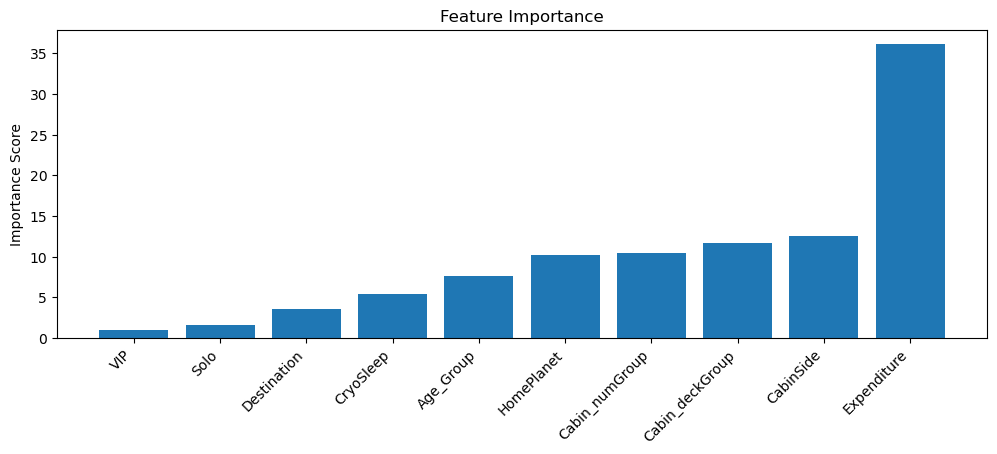

In [66]:
df_5 = df_4.drop(columns="Transported")

feature_importances = best_model.get_feature_importance()
feature_names = df_5.columns
indices = np.argsort(feature_importances)
num_features = len(feature_names)
ind = indices[-num_features:]

plt.figure(figsize = (12,4))
plt.title('Feature Importance')
plt.bar(range(num_features), feature_importances[ind], align='center')
plt.xticks(range(num_features), [feature_names[i] for i in ind], rotation = 45, ha='right')
plt.ylabel('Importance Score')
plt.show()